In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import cv2
from matplotlib import pyplot as plt
from pyefd import *
import random

from decimal import Decimal, getcontext

getcontext().prec = 100

<h2>Implementación da funcion signatura radial</h2>

Primeiro calculase o centroide do contorno empregando os momentos de primeira orde. A partir do centroide e os puntos do contorno calculamos a signatura de cada punto, coa cal se calculan os descritores e os momentos centrais.

Unha vez calculados os descritores e os momentos, construimos o vector de características noralizando os momentos centrais a cambios de escala.

In [61]:
def funcRadial(contorno, momentos, nDesc=15, sinaturas=[]):
    mCentrais = []
    descriptores = []
    caracteristicas = []

    cx = momentos['m10'] / momentos['m00']
    cy = momentos['m01'] / momentos['m00']

    # calculo a sinatura de cada punto do contorno
    for p in contorno:
        z = np.sqrt((p[0][0] - cx) ** 2 + (p[0][1] - cy) ** 2)
        sinaturas.append(z)

    mu_i=np.mean(sinaturas)
        
    for r in range(1, nDesc+1):
        suma=0
        for z in sinaturas: # calcula la media hasta el punto i
            suma += (z - mu_i) ** r
        
        M  = suma / len(contorno)
        
        if r>2:
            M = M / (mCentrais[1]**(r/2))
            
        mCentrais.append(M)

    return mCentrais

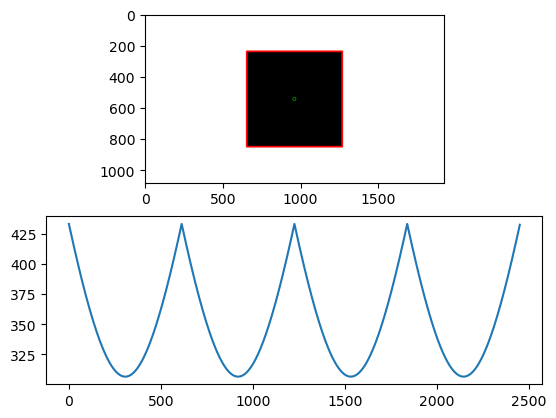

[-2.0423756939792765e-14, 1494.0178481485957, 0.5252080146669458, 1.9790735149807592, 2.278915219139537, 5.4001535432444605, 8.529832099322416, 17.55161267820514, 31.553258159461883, 62.46597359290278, 118.6092642366836, 233.54047880624208, 454.92990938090105, 899.550151359408, 1776.9411063942355, 3535.5211160513886, 7046.669802569531, 14104.043868463254, 28292.9922398148, 56921.21553764114]


In [62]:
img=cv2.imread('probasSimples/cadrado3.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(imgGray, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

momentos = cv2.moments(contours[0])

sinaturas=[]

cx=momentos['m10']/momentos['m00']
cy=momentos['m01']/momentos['m00']

cv2.drawContours(img, contours,-1,(255,0,0),10)
cv2.circle(img,(int(cx),int(cy)),10,(0,255,0),2)

features = funcRadial(contours[0], momentos, 20,sinaturas)
t=np.arange(0,len(sinaturas),1)

plt.subplot(2,1,1)
plt.imshow(img)

plt.subplot(2,1,2)
plt.plot(t,sinaturas)

plt.show()
print(features)

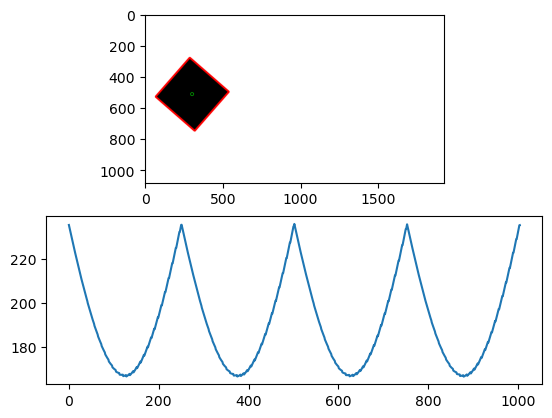

[-1.52713662611126e-14, 441.8981472988697, 0.5253088343045197, 1.9793001053983441, 2.2788320183275883, 5.399744918689814, 8.525999441299733, 17.54084984465748, 31.518320654560327, 62.37526066273943, 118.36699871054968, 232.93976820765417, 453.44139698799194, 895.9735595771281, 1768.406949115186, 3515.4720573579257, 6999.912165372123, 13996.022064318107, 28045.00652478675, 56355.64695580488]


In [69]:
img=cv2.imread('probasSimples/cadrado4.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(imgGray, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

momentos = cv2.moments(contours[0])

sinaturas=[]

cx=momentos['m10']/momentos['m00']
cy=momentos['m01']/momentos['m00']

cv2.drawContours(img, contours,-1,(255,0,0),10)
cv2.circle(img,(int(cx),int(cy)),10,(0,255,0),2)

features = funcRadial(contours[0], momentos, 20,sinaturas)
t=np.arange(0,len(sinaturas),1)

plt.subplot(2,1,1)
plt.imshow(img)

plt.subplot(2,1,2)
plt.plot(t,sinaturas)

plt.show()

print(features)

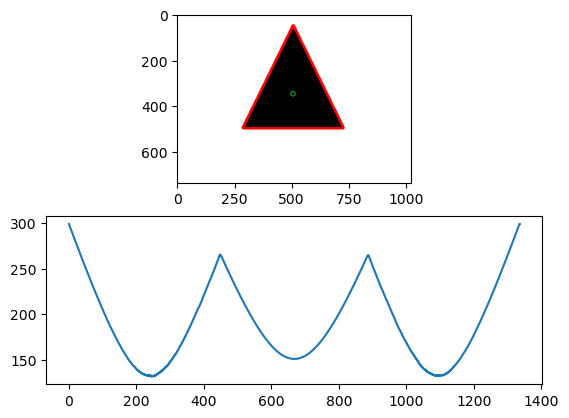

[-1.677242239385846e-14, 1948.2387168794778, 0.4644442761735991, 2.1216757250826137, 2.398206757112025, 6.67959751187287, 11.25727618670297, 26.834467047071076, 53.95164875574393, 123.38512573767545]


In [73]:
img=cv2.imread('probasSimples/triangulo.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(imgGray, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sinaturas=[]

momentos = cv2.moments(contours[0])

cx=momentos['m10']/momentos['m00']
cy=momentos['m01']/momentos['m00']

cv2.drawContours(img, contours,-1,(255,0,0),10)
cv2.circle(img,(int(cx),int(cy)),10,(0,255,0),2)

features = funcRadial(contours[0], momentos, 10,sinaturas)
t=np.arange(0,len(sinaturas),1)

plt.subplot(2,1,1)
plt.imshow(img)

plt.subplot(2,1,2)
plt.plot(t,sinaturas)

plt.show()

print(features)

[1.4551915228366852e-14, 938.4579858686842, 0.4603601109341556, 2.093005231438153, 2.331769817652846, 6.421336098397271, 10.631011635778771, 24.95104587897015, 49.21576679244646, 110.56757212098658]


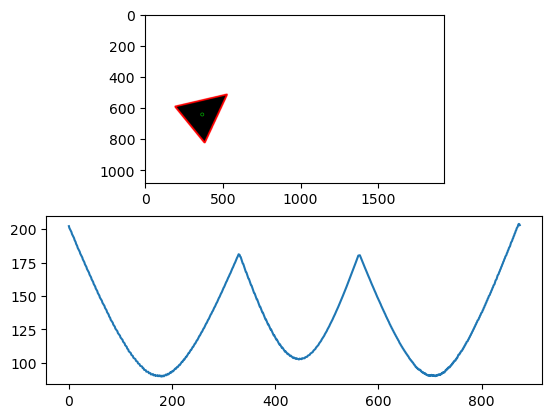

In [75]:
img=cv2.imread('probasSimples/triangulo2.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(imgGray, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sinaturas=[]

momentos = cv2.moments(contours[0])

cx=momentos['m10']/momentos['m00']
cy=momentos['m01']/momentos['m00']

cv2.drawContours(img, contours,-1,(255,0,0),10)
cv2.circle(img,(int(cx),int(cy)),10,(0,255,0),2)

features = funcRadial(contours[0], momentos, 10,sinaturas)
t=np.arange(0,len(sinaturas),1)

print(features)

plt.subplot(2,1,1)
plt.imshow(img)

plt.subplot(2,1,2)
plt.plot(t,sinaturas)

plt.show()

Extraemos os contornos externos de cada imaxe dentro dos dous paths. Obtendo o vector de caracteristicas para cada imaxe e gardandoo no dataset cunha etiqueta que será 1 para aquelas imaxes que sexan botellas e 0 para aquelas que non. As botellas estan nun directorio e as non botellas noutro, para facilitar a separacion.

In [64]:
imgPaths = ["botellas/", "bolboretas/","cubertos/"]
numImages = [65, 20,32]  # especificar o numero de imaxes en cada path
empregadas = []
dataset = open('ClasificadoresBy/dataset1.csv', 'w')

for imgPath, imNum in zip(imgPaths, numImages):
    for i in range(imNum):
        index = i
        #saltamos a imaxe 16 do path de non botellas, o contorno da problemas
        if index == 15 and 'bolboretas' in imgPath:
            empregadas.append(index)
            continue

        empregadas.append(index)
        imaxe = cv2.imread(imgPath + str(index + 1) + ".jpg")
        imaxe2 = cv2.cvtColor(imaxe, cv2.COLOR_BGR2GRAY)

        ret, binarizada = cv2.threshold(imaxe2, 200, 255, cv2.THRESH_BINARY_INV)
        contour, heriarchy = cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        momentos = []
        features = []

        momentos = cv2.moments(contour[0])
        features = funcRadial(contour[0], momentos, 3)

        features_str = ",".join(map(str, features))

        # etiquetamos a imaxe en funcion do path
        if 'botellas/' in imgPath:
            label=',1'
        
        elif 'bolboretas' in imgPath:
            label=',0'

        elif 'cubertos' in imgPath:
            label=',2'

        dataset.write(features_str + label)
        dataset.write('\n')

dataset.close()

<h2>Calculo dos descritores de Fourier e reconstrucion dos contornos a partir dos mesmos</h2>

Repetimos o proceso cos descritores de Fourier, obtendo o vector de caracteristicas e gardandoo etiquetado no dataset en función de se é unha botella ou non. Ademais, facemos unha reconstrución do último contorno a partir dos descritores e mostramos a reconstrución cando remata o bucle, isto poderíase facer para todas as imaxes pero considero que unha é necesaria para ver o funcionamento, ademais de ser máis lexible.

In [234]:
imgPaths = ['botellas/', 'bolboretas/','cubertos/']
numImages = [65, 20,32]  #numero de imaxes en cada path
dimension=30

dataset = open('ClasificadoresBy/dataset7.csv', 'w')

def Fourier(contorno,normalizar,dimension):
    coeffs = elliptic_fourier_descriptors(np.squeeze(contours[0]), order=dimension, normalize=normalizar)
    if normalizar:
        coeffs = coeffs[3:len(coeffs)]
    
    return coeffs

for imgPath, imNum in zip(imgPaths, numImages):
    if 'botellas/' in imgPath:
        label='1'
        
    elif 'bolboretas' in imgPath:
        label='0'
        
    elif 'cubertos' in imgPath:
        label='2'

    for index in range(imNum):

        img = cv2.imread(imgPath + str(index + 1) + '.jpg')
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, binary = cv2.threshold(imgGray, 200, 255, cv2.THRESH_BINARY_INV)

        if index == 15 and 'bolboretas/' in imgPath:
            continue

        # Encontrar os coeficientes do contorno da imaxe
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        
        # Encontrar os coeficientes de fourier do  contorno da imaxe
        coeffs=Fourier(contour[0],True,dimension)
        dcs = calculate_dc_coefficients(np.squeeze(contours[0]))
        
        for coeficientes in coeffs:
            coeffs_str = ','.join(map(str, coeficientes))

            # Escribir na mesma liña
            dataset.write(coeffs_str + ',')

        dataset.write(label + '\n')

dataset.close()

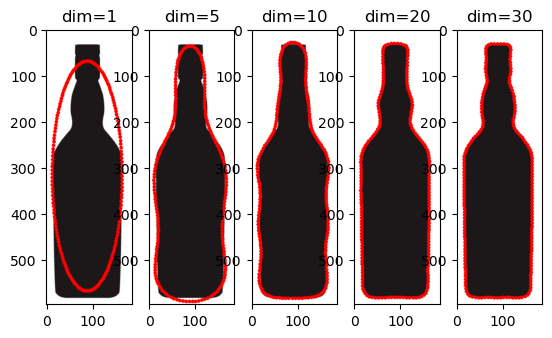

In [159]:
img=cv2.imread("botellas/1.jpg")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(imgGray, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
dcs=calculate_dc_coefficients(np.squeeze(contours[0]))

dimensions=[1,5,10,20,30]
listaCoeficientes=[]
reconstrucions=[]

for i in dimensions:
    listaCoeficientes.append(Fourier(contours[0],False,i))
    reconstrucions.append(reconstruct_contour(listaCoeficientes[-1], (dcs[0], dcs[1]), 200))

# Reconstrucion do ultimo contorno
for i in range(len(dimensions)):
    copia=img.copy()
    plt.subplot(1,len(dimensions),i+1)
    for p in reconstrucions[i]:
        cv2.circle(copia,(int(p[0]),int(p[1])),1,(255,0,0),5)
    
    plt.imshow(copia)
    plt.title("dim="+str(dimensions[i]))

plt.show()

<h2>Clase encargada do manexo de datos e calculo de metricas</h2>

In [66]:
class Data:
    trainData: np.array
    testData: np.array
    trainLabel: np.array
    testLabel: np.array

    def __init__(self, data, split_rate=0.2, bias=True, normal=False):
        self.trainData: np.array
        self.testData: np.array
        self.trainLabel: np.array
        self.testLabel: np.array
        self.split_rare = split_rate
        self.data = data
        self.bias = bias
        self.normal = normal
        self.prepare_data()

    def prepare_data(self):
        if self.normal:
            self.normalizer()

        if self.bias:
            self.data = np.insert(self.data, 0, 1, axis=1)

        self.trainData, self.testData, self.trainLabel, self.testLabel = train_test_split(self.data[:, :-1],
                                                                                          self.data[:, -1],
                                                                                          test_size=self.split_rare,
                                                                                          random_state=42)

    def normalizer(self):
        norm = np.linalg.norm(self.data[:, :-1])
        self.data[:, :-1] = self.data[:, :-1] / norm


def calculate_metrics(predicted, gold):
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for p, g in zip(predicted, gold):

        if p == 1 and g == 1:
            true_pos += 1
        if p == 0 and g == 0:
            true_neg += 1
        if p == 1 and g == 0:
            false_pos += 1
        if p == 0 and g == 1:
            false_neg += 1

    #Medidas de rendemento
    recall = true_pos / float(true_pos + false_neg)
    precision = true_pos / float(true_pos + false_pos)
    fscore = 2 * precision * recall / (precision + recall)

    return  precision, recall, fscore


def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


def load_data(path, array=True):
    train = pd.read_csv(path)
    if array:
        train = train.to_numpy()
    return train

<h2>Clase do clasificador Bayesiano Cadrático</h2>

In [67]:
class ByQuadratic:
    def __init__(self, data):
        self.data = data
        self.class_name_list = np.unique(data.trainLabel)
        self.class_name_list.sort()
        self.means = None
        self.priors = None
        self.covariance_matrix = None

    def calculate_prior(self):
        prior = np.zeros(self.class_name_list.size)
        for index, className in enumerate(self.class_name_list):
            prior[index] = self.data.trainLabel[self.data.trainLabel == className].size \
                           / self.data.trainLabel.size
        self.priors = prior

    def calculate_mean(self):
        means = np.zeros((self.class_name_list.size, self.data.trainData.shape[1]))
        covariance_matrix = []
        for index, className in enumerate(self.class_name_list):
            row_data = self.data.trainData[self.data.trainLabel == className]
            mean = np.asmatrix(np.mean(row_data, axis=0))
            means[index] = mean
            cov_matrix = (row_data - mean).T @ (row_data - mean) / self.data.trainData.shape[0]
            covariance_matrix.append(cov_matrix)

        self.means = means
        self.covariance_matrix = covariance_matrix

    def predict(self, data):
        probs = np.asmatrix(np.zeros((data.shape[0], self.priors.size)))
        for index, class_abel in enumerate(self.class_name_list):
            probs[:, index] = self.probability(data, index)
        return np.argmax(probs, axis=1)

    def probability(self, data, index):
        X = np.asmatrix(data)
        cov_matrix_det = np.linalg.det(self.covariance_matrix[index])
        cov_matrix_inv = np.linalg.pinv(self.covariance_matrix[index])
        Xm = X - self.means[index]
        Xm_covariance = (Xm @ cov_matrix_inv) @ Xm.T
        Xm_covariance_sum = Xm_covariance.sum(axis=1)
        return -0.5 * Xm_covariance_sum - 0.5 * np.log(cov_matrix_det) + np.log(self.priors[index])

    def fix(self):
        self.calculate_prior()
        self.calculate_mean()
        
def mostrarFallos(fallos,datasetPath):
    dataset=open(datasetPath,'r')
    lineas=dataset.readlines()

    imaxes=[]

    for indx in fallos:
        if indx<=65:
            imaxes.append('botellas/'+str(indx)+'.jpg')

        elif indx>65 and indx<=84:
            imaxes.append('bolboretas/'+str(indx-64)+'.jpg')

        elif indx>=85:
            imaxes.append('cubertos/'+str(indx-84)+'.jpg')
            
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    for i in range(len(imaxes)):
        img = cv2.imread(imaxes[i], 0)
        plt.subplot(1, len(imaxes), i+1, frame_on=False)

        plt.imshow(img, cmap="gray")

        plt.xticks([])
        plt.yticks([])

    dataset.close()

    plt.show()

<h2>Carga dos datasets e avaliacion das predicions</h2>

O dataset 1 correspondese cos descritores da funcion radial, o dataset 2 cos baseados nos descritores de Fourier.



------Entrenamiento Dataset 1------
Train ACC = 69.56521739130434
Train confusion matrix = 
[[14  0  0]
 [ 0 50  2]
 [26  0  0]]
Train precission = [0.35 1.   0.  ]
Train recall = [1.         0.96153846 0.        ]
Train F1_score = [0.51851852 0.98039216 0.        ]

------Test Dataset 1------
test ACC = 69.56521739130434 

Test     confusion matrix = 
[[ 5  0  0]
 [ 0 11  1]
 [ 6  0  0]]
Test precission = [0.45454545 1.         0.        ]
Test recall = [1.         0.91666667 0.        ]
Test F1_score = [0.625      0.95652174 0.        ]


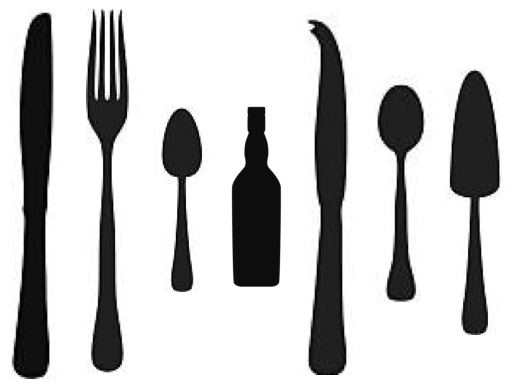

In [68]:
path='ClasificadoresBy/dataset1.csv'

resultados=[]
with open(path, 'r') as dataset:
    for linea in dataset:
        # Dividir la línea por comas y convertir cada elemento a un número flotante
        elementos = [float(e) for e in linea.strip().split(',')[:-1]]
        elementos_redondeados = [round(e, 8) for e in elementos]
        resultados.append(elementos_redondeados)

rawData = load_data(path)
data = Data(rawData, bias=False)
#Instantacionamos e adestramos
model_q = ByQuadratic(data)
model_q.fix()

#Predecimos co modelos adestrado os datos de adestramento
# e test. Ollo: non se gardan os datos derivados do adestramento
#Ti debes gardalos en disco e lelos cando os precises.
predicted_train = model_q.predict(data.trainData)
predicted_test = model_q.predict(data.testData)

print(f"\n\n------Entrenamiento Dataset {1}------")

print(f"Train ACC = {accuracy_metric(data.trainLabel, predicted_train)}")
print(f"Train confusion matrix = \n{confusion_matrix(data.trainLabel,np.asarray(predicted_train))}")
print(f"Train precission = {precision_score(data.trainLabel,np.asarray(predicted_train),average=None)}")
print(f"Train recall = {recall_score(data.trainLabel,np.asarray(predicted_train),average=None)}")
print(f"Train F1_score = {f1_score(data.trainLabel,np.asarray(predicted_train),average=None)}")

print(f"\n------Test Dataset {1}------")

print(f"test ACC = {accuracy_metric(data.testLabel, np.asarray(predicted_test))} \n")
print(f"Test     confusion matrix = \n{confusion_matrix(data.testLabel,np.asarray(predicted_test))}")
print(f"Test precission = {precision_score(data.testLabel,np.asarray(predicted_test),average=None)}")
print(f"Test recall = {recall_score(data.testLabel,np.asarray(predicted_test),average=None)}")
print(f"Test F1_score = {f1_score(data.testLabel,np.asarray(predicted_test),average=None)}")

fallos=[]
misclassified_indices = np.where(data.testLabel != np.asarray(predicted_test).T[0])

for misclassified_index in misclassified_indices[0]:
    for idx, vector in enumerate(resultados):
        if np.linalg.norm(data.testData[misclassified_index] - np.array(vector))<0.000001:
            fallos.append(idx)

mostrarFallos(fallos,path)



------Entrenamiento Dataset 2------
Train ACC = 69.56521739130434
Train confusion matrix = 
[[ 2  5  7]
 [ 2 49  1]
 [ 3 10 13]]
Train precission = [0.28571429 0.765625   0.61904762]
Train recall = [0.14285714 0.94230769 0.5       ]
Train F1_score = [0.19047619 0.84482759 0.55319149]

------Test Dataset 2------
test ACC = 73.91304347826086 

Test     confusion matrix = 
[[ 3  1  1]
 [ 0 12  0]
 [ 1  3  2]]
Test precission = [0.75       0.75       0.66666667]
Test recall = [0.6        1.         0.33333333]
Test F1_score = [0.66666667 0.85714286 0.44444444]


------Entrenamiento Dataset 3------
Train ACC = 28.26086956521739
Train confusion matrix = 
[[ 0  0 14]
 [ 0  0 52]
 [ 0  0 26]]
Train precission = [0.        0.        0.2826087]
Train recall = [0. 0. 1.]
Train F1_score = [0.         0.         0.44067797]

------Test Dataset 3------
test ACC = 26.08695652173913 

Test     confusion matrix = 
[[ 0  0  5]
 [ 0  0 12]
 [ 0  0  6]]
Test precission = [0.         0.         0.2608695

/tmp/ipykernel_4965/3461306924.py:43: RuntimeWarning: divide by zero encountered in log
  return -0.5 * Xm_covariance_sum - 0.5 * np.log(cov_matrix_det) + np.log(self.priors[index])
/tmp/ipykernel_4965/3461306924.py:43: RuntimeWarning: invalid value encountered in log
  return -0.5 * Xm_covariance_sum - 0.5 * np.log(cov_matrix_det) + np.log(self.priors[index])
/home/ferni/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferni/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_4965/346

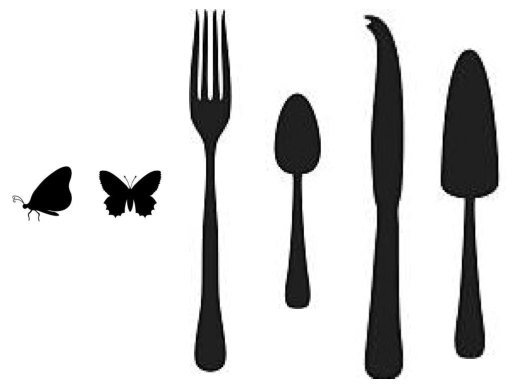

IMAXES NAS QUE FALLA O MODELO CON DIMENSION 10


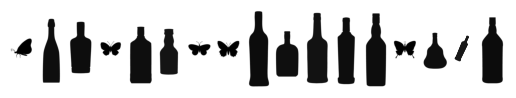

IMAXES NAS QUE FALLA O MODELO CON DIMENSION 50


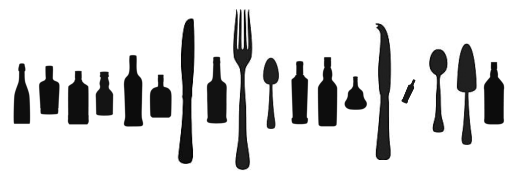

In [46]:
lista=['ClasificadoresBy/dataset2.csv','ClasificadoresBy/dataset3.csv','ClasificadoresBy/dataset4.csv']
index=0
fallosTotales=[]
for path in lista:
    
    fallos=[]
    resultados=[]
    with open(path, 'r') as dataset:
        for linea in dataset:
            # Dividir la línea por comas y convertir cada elemento a un número flotante
            elementos = [float(e) for e in linea.strip().split(',')[:-1]]
            elementos_redondeados = [round(e, 8) for e in elementos]
            resultados.append(elementos_redondeados)
            
    rawData = load_data(path)
    data = Data(rawData, bias=False)
    #Instantacionamos e adestramos
    model_q = ByQuadratic(data)
    model_q.fix()

    #Predecimos co modelos adestrado os datos de adestramento
    # e test. Ollo: non se gardan os datos derivados do adestramento
    #Ti debes gardalos en disco e lelos cando os precises.
    predicted_train = model_q.predict(data.trainData)
    predicted_test = model_q.predict(data.testData)

    print(f"\n\n------Entrenamiento Dataset {path[-5]}------")

    print(f"Train ACC = {accuracy_metric(data.trainLabel, predicted_train)}")
    print(f"Train confusion matrix = \n{confusion_matrix(data.trainLabel,np.asarray(predicted_train))}")
    print(f"Train precission = {precision_score(data.trainLabel,np.asarray(predicted_train),average=None)}")
    print(f"Train recall = {recall_score(data.trainLabel,np.asarray(predicted_train),average=None)}")
    print(f"Train F1_score = {f1_score(data.trainLabel,np.asarray(predicted_train),average=None)}")

    print(f"\n------Test Dataset {path[-5]}------")

    print(f"test ACC = {accuracy_metric(data.testLabel, np.asarray(predicted_test))} \n")
    print(f"Test     confusion matrix = \n{confusion_matrix(data.testLabel,np.asarray(predicted_test))}")
    print(f"Test precission = {precision_score(data.testLabel,np.asarray(predicted_test),average=None)}")
    print(f"Test recall = {recall_score(data.testLabel,np.asarray(predicted_test),average=None)}")
    print(f"Test F1_score = {f1_score(data.testLabel,np.asarray(predicted_test),average=None)}")

    index+=1
    
    misclassified_indices = np.where(data.testLabel != np.asarray(predicted_test).T[0])

    for misclassified_index in misclassified_indices[0]:
        for idx, vector in enumerate(resultados):
            if np.linalg.norm(data.testData[misclassified_index] - np.array(vector))<0.000001:
                fallos.append(idx)
                
    fallosTotales.append(fallos)
    
print("IMAXES NAS QUE FALLA O MODELO CON DIMENSION 5")
mostrarFallos(fallosTotales[0],lista[0])

print("IMAXES NAS QUE FALLA O MODELO CON DIMENSION 10")
mostrarFallos(fallosTotales[1],lista[1])

print("IMAXES NAS QUE FALLA O MODELO CON DIMENSION 50")
mostrarFallos(fallosTotales[2],lista[2])



------Entrenamiento Dataset 1------
Train ACC = 69.56521739130434
Train confusion matrix = 
[[14  0  0]
 [ 0 50  2]
 [26  0  0]]
Train precission = [0.35 1.   0.  ]
Train recall = [1.         0.96153846 0.        ]
Train F1_score = [0.51851852 0.98039216 0.        ]

------Test Dataset 1------
test ACC = 69.56521739130434 

Test     confusion matrix = 
[[ 5  0  0]
 [ 0 11  1]
 [ 6  0  0]]
Test precission = [0.45454545 1.         0.        ]
Test recall = [1.         0.91666667 0.        ]
Test F1_score = [0.625      0.95652174 0.        ]

[10 12 13 15 18 20 21]


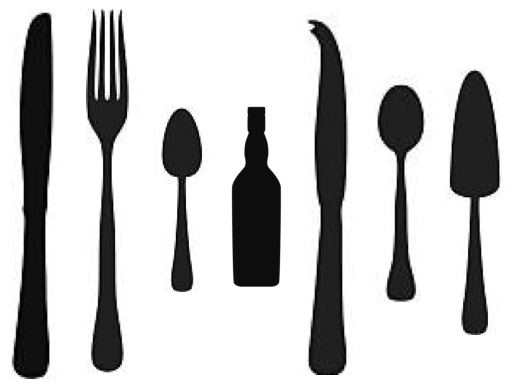

In [70]:
## path='ClasificadoresBy/dataset5.csv'

resultados = []

with open(path, 'r') as dataset:
    for linea in dataset:
        # Dividir la línea por comas y convertir cada elemento a un número flotante
        elementos = [float(e) for e in linea.strip().split(',')[:-1]]
        elementos_redondeados = [round(e, 8) for e in elementos]
        resultados.append(elementos_redondeados)

rawData = load_data(path)
data = Data(rawData, bias=False)
#Instantacionamos e adestramos
model_q = ByQuadratic(data)
model_q.fix()

#Predecimos co modelos adestrado os datos de adestramento
# e test. Ollo: non se gardan os datos derivados do adestramento
#Ti debes gardalos en disco e lelos cando os precises.
predicted_train = model_q.predict(data.trainData)
predicted_test = model_q.predict(data.testData)

print(f"\n\n------Entrenamiento Dataset {path[-5]}------")

print(f"Train ACC = {accuracy_metric(data.trainLabel, predicted_train)}")
print(f"Train confusion matrix = \n{confusion_matrix(data.trainLabel,np.asarray(predicted_train))}")
print(f"Train precission = {precision_score(data.trainLabel,np.asarray(predicted_train),average=None)}")
print(f"Train recall = {recall_score(data.trainLabel,np.asarray(predicted_train),average=None)}")
print(f"Train F1_score = {f1_score(data.trainLabel,np.asarray(predicted_train),average=None)}")

print(f"\n------Test Dataset {path[-5]}------")

print(f"test ACC = {accuracy_metric(data.testLabel, np.asarray(predicted_test))} \n")
print(f"Test     confusion matrix = \n{confusion_matrix(data.testLabel,np.asarray(predicted_test))}")
print(f"Test precission = {precision_score(data.testLabel,np.asarray(predicted_test),average=None)}")
print(f"Test recall = {recall_score(data.testLabel,np.asarray(predicted_test),average=None)}")
print(f"Test F1_score = {f1_score(data.testLabel,np.asarray(predicted_test),average=None)}")

print()

misclassified_indices = np.where(data.testLabel != np.asarray(predicted_test).T[0])

print(misclassified_indices[0])
fallos=[]
for misclassified_index in misclassified_indices[0]:
    for idx, vector in enumerate(resultados):

        if np.linalg.norm(data.testData[misclassified_index] - np.array(vector))<0.000001:
            fallos.append(idx)
            
mostrarFallos(fallos,path)

<h2>Análise de resultados</h2>

Para o adestramento do clasificador empregando os descritores da función radial obervamos un bo rendemento co conxunto de test. A matriz de confusión mostra que o modelo identificou correctamente 14 mostras (8 verdadeiros positivos e 6 verdadeiros negativos), mentres que houbo 3 falsos negativos e 1 falso positivo. O resto de métricas dinnos que o modelo é capaz de identificar mellor a clase 1 (botellas) que a clase 0 (todo aquelo que non sexa unha botella), tanto a precisión como o recall reflexan isto. 

O F1 score para a clase 0 vale 0.75, o que quere dicir que o clasificador identifica ben as instancias da clase pero ainda se pode mellorar, o cal se podería lograr con máis imaxes da clase. O score para a outra clase é lixeiramente máis alto, fai un traballo mellor ao clasificar positivamente as botellas.


O dataset 2 corresponde cos datos dos descritores de Fourier. Vemos dos resultados que o modelo funciona moito mellor en xeral que o da función radial, non hai falsos positivos no conxunto de test e só hai 2 falsos negativos. O F1-score moi cercano a 1 para ambas clases tamén reflexa que un rendemento case ideal. De todas formas, segue habendo espazo para melloras á hora de mellorar a distinción dos obxectos que non son botellas.

Finalmente, considero importante destacar que o clasificador funciona mellor na fase de test se non se describen os contornos empregando un gran número de descritores, a pesar de que no entrenamento mostran un bo rendemento. Isto débese a que menos descritores fan un mellor traballo de describir a forma xeral do contorno, mentres que empregando máis a descrición é máis detallada e producirá <italic>overfitting</italic> durante a fase de adestrameto.